# Parameter tuning

Probability of synaptic transmission is set tp 35% and unitary conductance is 100pS, which is scaled by network size. In Str-to-GP synapses, this unitary conductance is divided by the number of Str cells. In GP-to-SNr synapses, the unitary conductance is scaled by the number of GP cells. These parameters are manipulated directly in the plotBGdelayline.m file

The 4th subfigure shows total synaptic input received by a GP cell from Str cells. 
The last subfigure is the total synaptic input received by a SNr cell from all GP cells.

Elapsed time is 0.538402 seconds.
> In legend>set_children_and_strings (line 674)
  In legend>make_legend (line 346)
  In legend (line 294)
  In plotBGdelayline (line 26)
  In run (line 86)


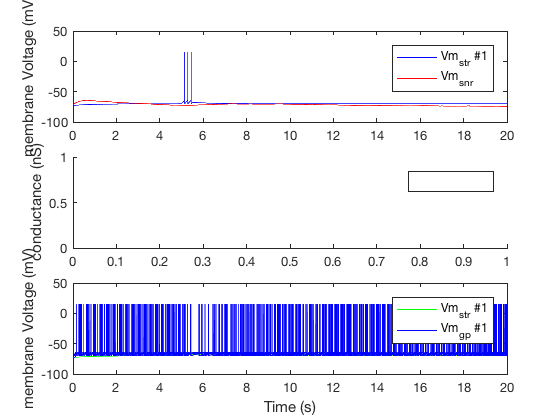

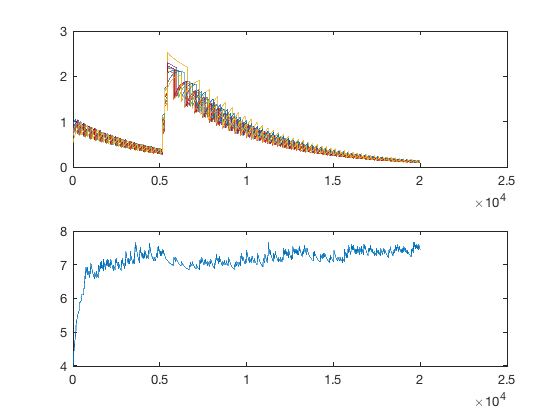

In [1]:
[Vm_gp,Vm_snr,Vm_str,Isyn_gp_out,Isyn_snr_out] = BGdelayline('n',100);
run('plotBGdelayline.m')

GP stops firing, but SNr is quiescent. Therefore, I increase constant excitatory input to SNr from 7pA to 10pA in BGdelayline function.

Elapsed time is 0.463242 seconds.
> In legend>set_children_and_strings (line 674)
  In legend>make_legend (line 346)
  In legend (line 294)
  In plotBGdelayline (line 26)
  In run (line 86)


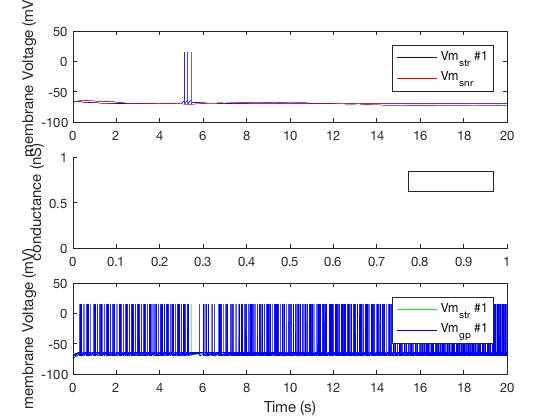

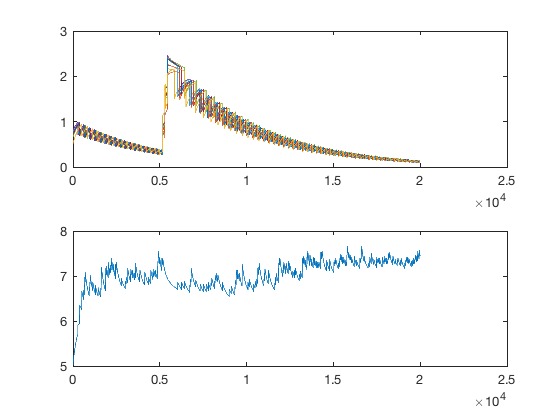

In [2]:
[Vm_gp,Vm_snr,Vm_str,Isyn_gp_out,Isyn_snr_out] = BGdelayline('n',100);
run('plotBGdelayline.m')

Still SNr excitatory input is not strong enough to overcome inhibition from GP cells. Hence, the E_in is increased to 12.5pA.

Elapsed time is 0.464197 seconds.


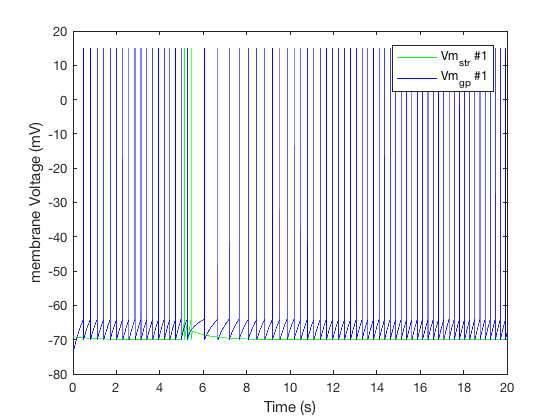

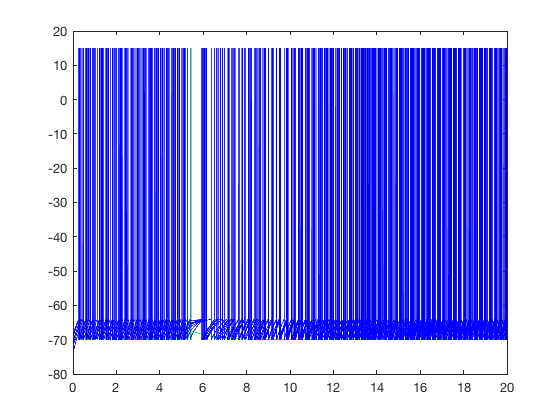

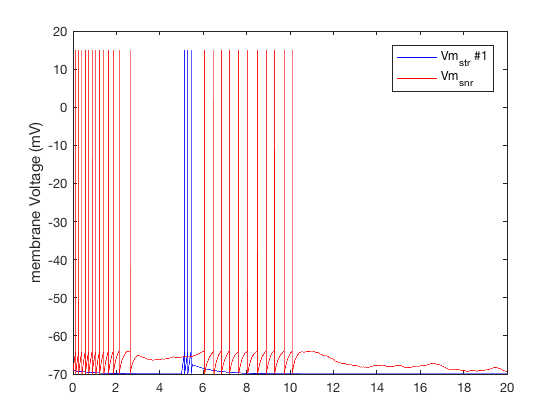

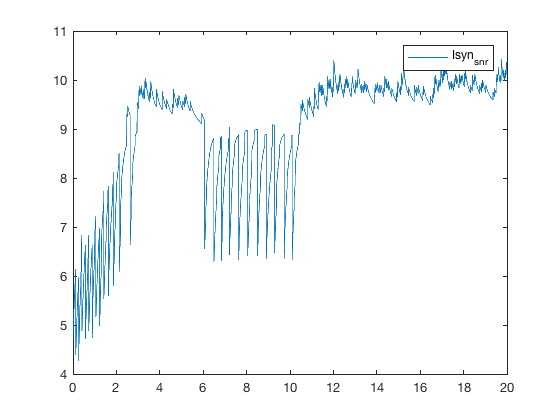

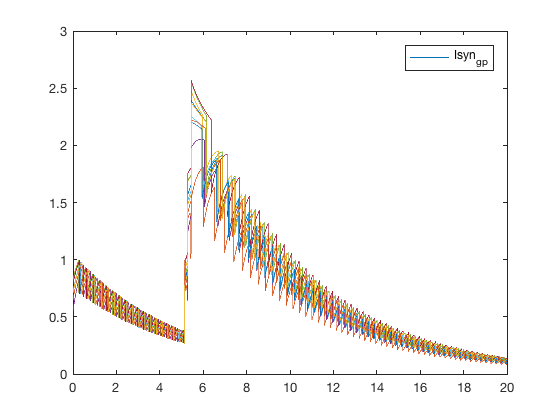

In [26]:
[Vm_gp,Vm_snr,Vm_str,Isyn_gp_out,Isyn_snr_out] = BGdelayline('n',100);
%run('plotBGdelayline.m')

t_span = 0:0.001:20;

figure
%subplot(4,1,4)
plot(t_span,Isyn_gp_out')
legend('Isyn_{gp}')

figure
%subplot(4,1,3)
plot(t_span,Isyn_snr_out')
legend('Isyn_{snr}')
figure
%subplot(4,1,2)
plot(t_span,Vm_str(5,1:length(t_span)),'b')
hold on
%  plot(t_span,Vm_gp(1,1:length(t_span))','b')
plot(t_span,Vm_snr(1,1:length(t_span)),'r')
% legend('Vm_{str}','Vm_{gp}','Vm_{snr}')
legend('Vm_{str} #1','Vm_{snr}')
ylabel('membrane Voltage (mV)')
% xlabel('Time (s)')

%subplot(4,1,3)
%hold on
%plot(t_span,g_gp2snr(:,1:length(t_span)),'g')
% LEGEND('G_{STR2GP}','G_{GP2SNR}')
%legend('g_{gp2snr}')
%ylabel('conductance (nS)')
figure
%subplot(4,1,1)
plot(t_span,Vm_str(5,1:length(t_span)),'g')
hold on
plot(t_span,Vm_gp(:,1:length(t_span)),'b')

figure
plot(t_span,Vm_str(5,1:length(t_span)),'g')
hold on
plot(t_span,Vm_gp(4,1:length(t_span)),'b')

%  plot(t_span,Vm_snr(1,1:length(t_span)),'r')
% legend('Vm_{str}','Vm_{gp}','Vm_{snr}')
legend('Vm_{str} #1','Vm_{gp} #1')
ylabel('membrane Voltage (mV)')
xlabel('Time (s)')


Onset of striatum firing triggers disinhibition of SNr firing, as indicated by increased firing after ~1s delay

# Effect of GP firing on delay time

One idea is that, in a cascading inhibition, GP firing rate before the activation of Str modulates the delay time of SNr cells.

Increase in GP firing can be achieved through:
1) increasing net excitatory input
2) lowering spike threshold



First, I wrote a function that will conveniently plot spike raster of all the cells in BG delay line:

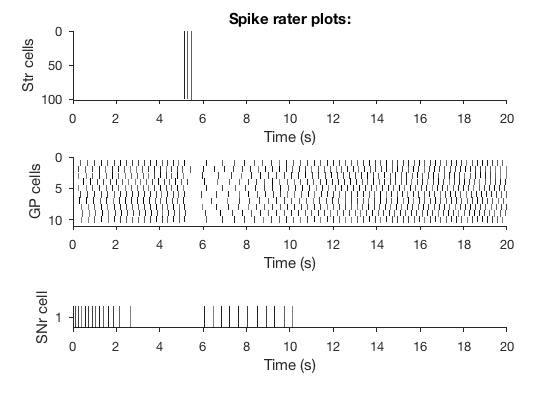

In [97]:
%% Spike Rasters

figure
subplot(3,1,1)
plotRaster(Vm_str);
title('Spike rater plots:')
ylabel('Str cells')
subplot(3,1,2)

plotRaster(Vm_gp);
ylabel('GP cells')
subplot(3,1,3)

plotRaster(Vm_snr);
ylabel('SNr cell')


## 1) Increase net excitatory input to GP cells

The net excitatory input is increased from 3pA to 4pA while maintaining the ratio of excitatory input size to GP and SNr (3/10); 

Elapsed time is 0.462568 seconds.


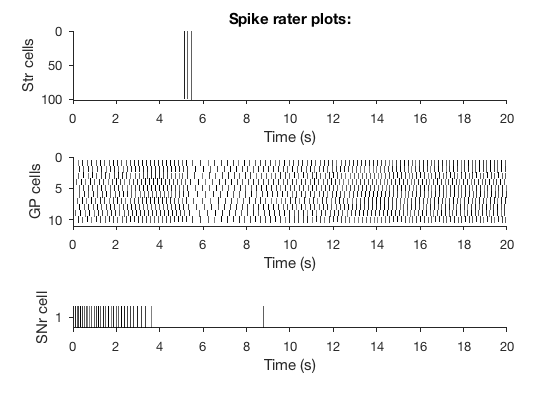

In [102]:
%%Simulation
[Vm_gp,Vm_snr,Vm_str,Isyn_gp_out,Isyn_snr_out] = BGdelayline(); 

%%Spike Rasters
figure
subplot(3,1,1)
plotRaster(Vm_str);
title('Spike rater plots:')
ylabel('Str cells')
subplot(3,1,2)

plotRaster(Vm_gp);
ylabel('GP cells')
subplot(3,1,3)

plotRaster(Vm_snr);
ylabel('SNr cell')

The simulation above reveals that the increase in firing rate in GP lengthens delay in SNr. 
Next, I look at the effect of changing net excitatory input at finer scale of 0.1pA, which is sufficient to alter firing of GP neurons.

At 3.1pA,

Elapsed time is 0.426392 seconds.


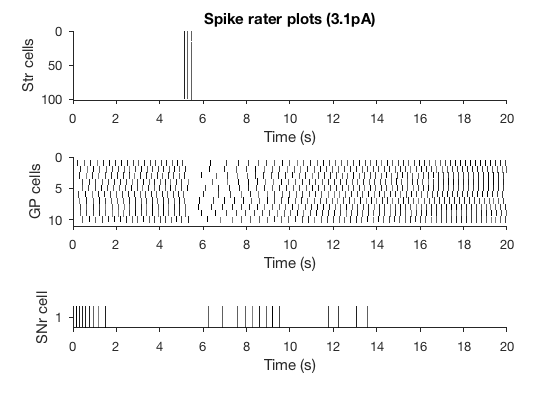

In [118]:
%%Simulation
[Vm_gp,Vm_snr,Vm_str,Isyn_gp_out,Isyn_snr_out] = BGdelayline(); 

%%Spike Rasters
figure
subplot(3,1,1)
plotRaster(Vm_str);
title('Spike rater plots (3.1pA)')
ylabel('Str cells')
subplot(3,1,2)

plotRaster(Vm_gp);
ylabel('GP cells')
subplot(3,1,3)

plotRaster(Vm_snr);
ylabel('SNr cell')

The latency of first SNr spike after stimulation is increased from ~1s to ~1.2s, but this is just one incidence. It is necessry to plot histogram of spike latency from numerous simulations. 

To Do: introduce a sampling method (ex Monte Carlo) so that I can analyze distribution of spike latency and compute rate estimate from a larger sample.  